<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/Cost_living/'
%run Cost_living_configuration.ipynb

/content/drive/My Drive/ColabNotebooks/Cost_living


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [2]:
# Utworzenie obiektu data frame, gdzie będą przechowywane informacje o transporcie:
transport = df_transponed['transport']

DistributionObj = Distribution(transport)
CorrelationObj = Correlation(dataset=transport)


transport.head()

Unnamed: 0                                        Gasoline_1l  ...  VolkswagenGolf_car
Region          Country            City                        ...                    
Caribbean       Dominican Republic Santo Domingo         1.05  ...            20780.40
Central America Costa Rica         San Jose              1.00  ...            20446.99
                Mexico             Guadalajara           1.00  ...            16535.22
                                   Mexico City           0.98  ...            16702.48
                                   Monterrey             0.97  ...            16424.20

[5 rows x 8 columns]

In [3]:
transport.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160 entries, ('Caribbean', 'Dominican Republic', 'Santo Domingo') to ('Western Europe', 'Switzerland', 'Zurich')
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gasoline_1l                   160 non-null    float64
 1   MonthlyPass_Regular           160 non-null    float64
 2   OneWay_Ticket_LocalTransport  160 non-null    float64
 3   Taxi_1h_Waiting               160 non-null    float64
 4   Taxi_1km                      160 non-null    float64
 5   Taxi_Start                    160 non-null    float64
 6   Toyota Corolla_Or_New Car     160 non-null    float64
 7   VolkswagenGolf_car            160 non-null    float64
dtypes: float64(8)
memory usage: 27.9 KB


In [4]:
transport.index

MultiIndex([(      'Caribbean', 'Dominican Republic', 'Santo Domingo'),
            ('Central America',         'Costa Rica',      'San Jose'),
            ('Central America',             'Mexico',   'Guadalajara'),
            ('Central America',             'Mexico',   'Mexico City'),
            ('Central America',             'Mexico',     'Monterrey'),
            ('Central America',             'Panama',   'Panama City'),
            (   'Central Asia',         'Kazakhstan',        'Almaty'),
            ( 'Eastern Africa',              'Kenya',       'Nairobi'),
            (   'Eastern Asia',              'China',       'Beijing'),
            (   'Eastern Asia',              'China',      'Shanghai'),
            ...
            ( 'Western Europe',             'France',         'Paris'),
            ( 'Western Europe',            'Germany',        'Berlin'),
            ( 'Western Europe',            'Germany',     'Frankfurt'),
            ( 'Western Europe',            'Germ

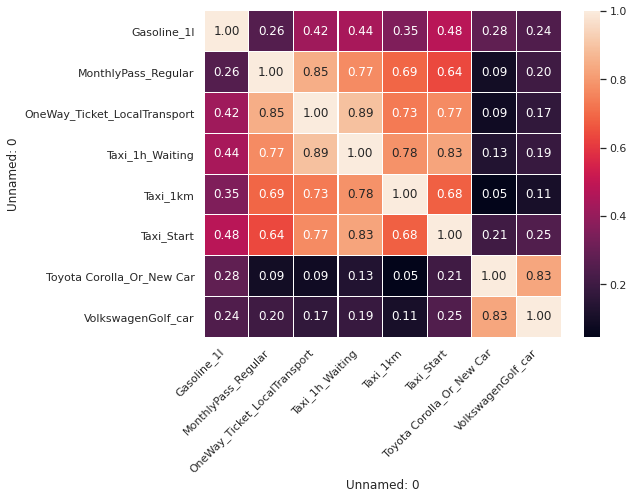

In [5]:
CorrelationObj.addCorrelationmap()

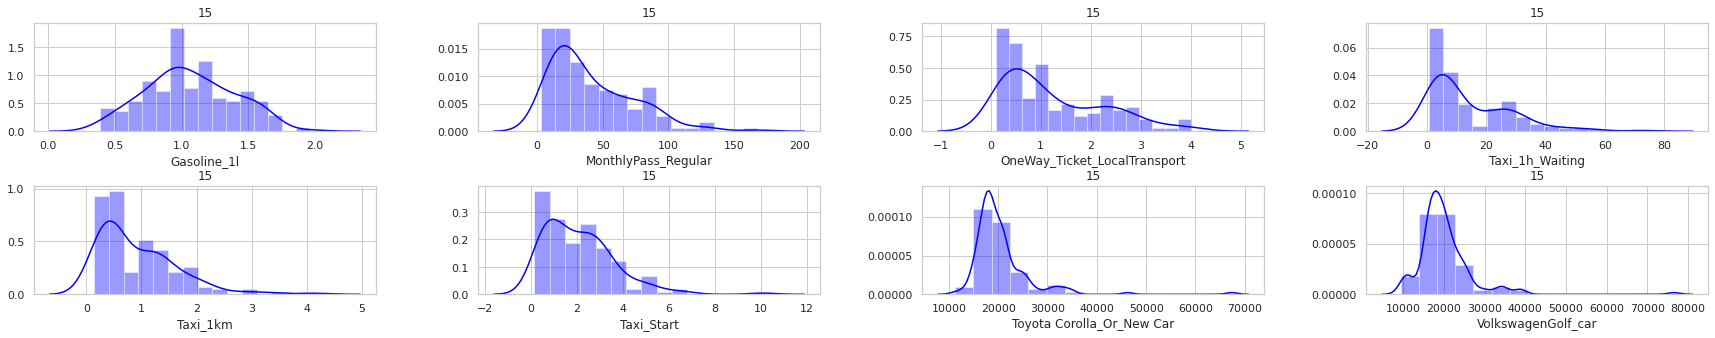

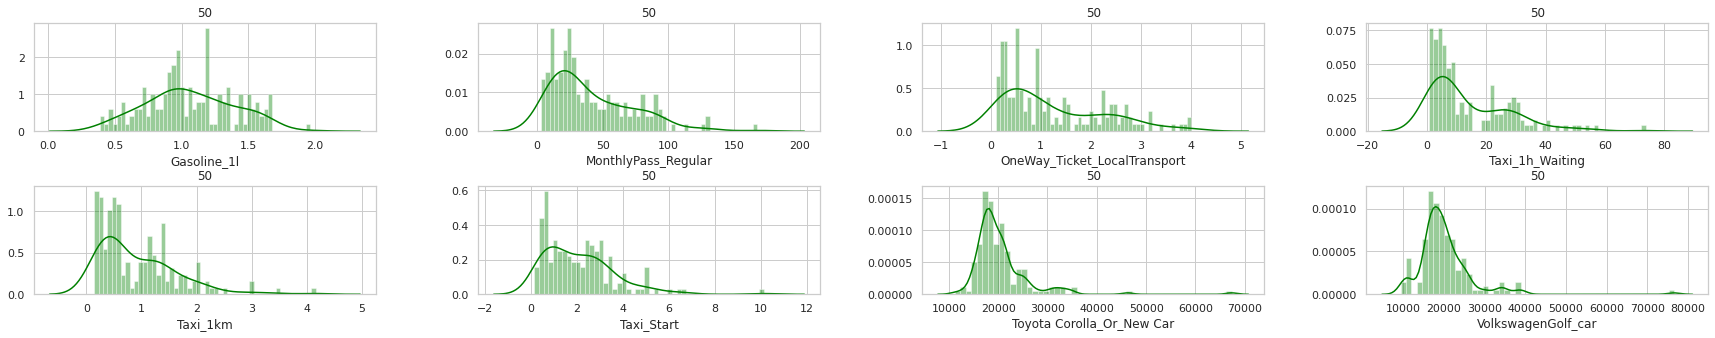

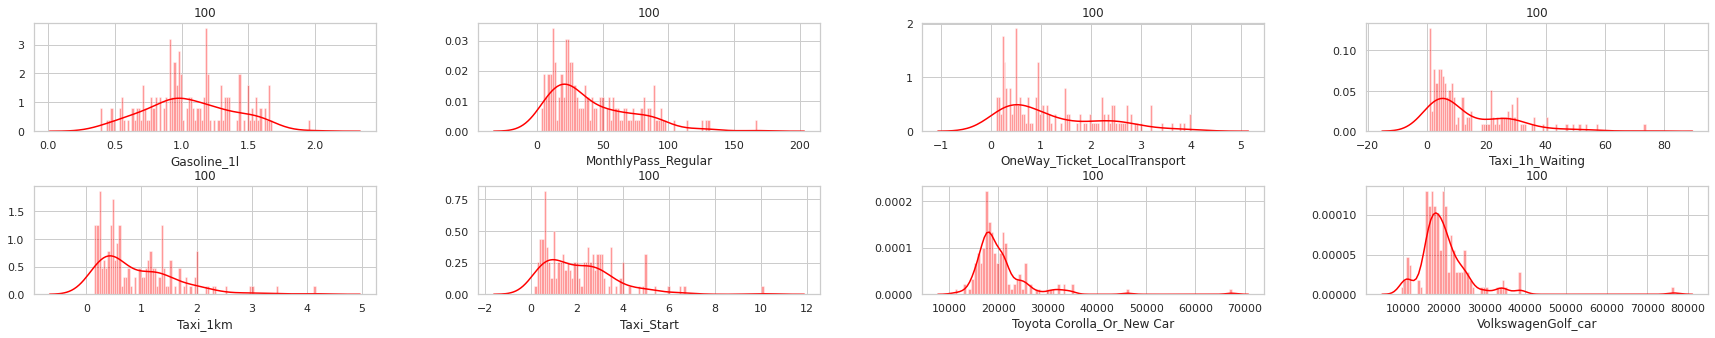

In [6]:
col_names = [
             'Gasoline_1l', 	'MonthlyPass_Regular', 	'OneWay_Ticket_LocalTransport', 	'Taxi_1h_Waiting',
             'Taxi_1km', 	'Taxi_Start', 'Toyota Corolla_Or_New Car', 	'VolkswagenGolf_car'
             ]


def create_histogram(set_bins, set_color):
  fig = plt.figure(figsize=(30, 5))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)

  rows= 2
  cols= 4
  col_idx = 0

  for i in range(1, 9):
    fig.add_subplot(rows, cols, i) 
    g = sns.distplot(transport[col_names[col_idx]], bins=set_bins, color=set_color)
    g.set(title= set_bins)
    col_idx += 1

  plt.show()


create_histogram(set_bins = 15, set_color = 'blue')
create_histogram(set_bins = 50, set_color = 'green')
create_histogram(set_bins = 100, set_color = 'red')

In [7]:
transport.reset_index(inplace=True)
transport.head()

Unnamed: 0,Region,Country,City,Gasoline_1l,MonthlyPass_Regular,OneWay_Ticket_LocalTransport,Taxi_1h_Waiting,Taxi_1km,Taxi_Start,Toyota Corolla_Or_New Car,VolkswagenGolf_car
0,Caribbean,Dominican Republic,Santo Domingo,1.05,34.01,0.43,3.40,2.55,3.40,20430.09,20780.40
1,Central America,Costa Rica,San Jose,1.00,42.12,0.63,5.95,1.04,1.02,23528.04,20446.99
2,Central America,Mexico,Guadalajara,1.00,18.67,0.43,7.16,0.46,1.43,15579.09,16535.22
3,Central America,Mexico,Mexico City,0.98,14.32,0.29,4.94,0.29,0.62,14844.85,16702.48
4,Central America,Mexico,Monterrey,0.97,17.96,0.57,7.18,0.38,0.67,14421.34,16424.20


In [9]:
Region_list = list(transport.columns[:1])
transport_list = list(transport.columns[3:])

transport_and_region_list = Region_list + transport_list

transport_and_region_list

['Region',
 'Gasoline_1l',
 'MonthlyPass_Regular',
 'OneWay_Ticket_LocalTransport',
 'Taxi_1h_Waiting',
 'Taxi_1km',
 'Taxi_Start',
 'Toyota Corolla_Or_New Car',
 'VolkswagenGolf_car']

In [10]:
transport_regions = transport[transport_and_region_list ]

transport_regions.set_index('Region', inplace=True)
transport_regions.head()

Unnamed: 0,Gasoline_1l,MonthlyPass_Regular,OneWay_Ticket_LocalTransport,Taxi_1h_Waiting,Taxi_1km,Taxi_Start,Toyota Corolla_Or_New Car,VolkswagenGolf_car
Region,,,,,,,,
Caribbean,1.05,34.01,0.43,3.40,2.55,3.40,20430.09,20780.40
Central America,1.00,42.12,0.63,5.95,1.04,1.02,23528.04,20446.99
Central America,1.00,18.67,0.43,7.16,0.46,1.43,15579.09,16535.22
Central America,0.98,14.32,0.29,4.94,0.29,0.62,14844.85,16702.48
Central America,0.97,17.96,0.57,7.18,0.38,0.67,14421.34,16424.20


In [12]:
# Pogrupowanie danych
transport_regions = transport_regions.groupby(by='Region')

transport_regions_mean = transport_regions.agg(
                                        {
                                          'Gasoline_1l'                   : 'mean',
                                          'MonthlyPass_Regular'           : 'mean',
                                          'OneWay_Ticket_LocalTransport'  : 'mean',
                                          'Taxi_1h_Waiting'               : 'mean',
                                          'Taxi_1km'                      : 'mean',
                                          'Taxi_Start'                    : 'mean',
                                          'Toyota Corolla_Or_New Car'     : 'mean',
                                          'VolkswagenGolf_car'            : 'mean'                                                                             
                                          }
                                        )

# Posortowanie wartości
transport_regions_mean = transport_regions_mean.sort_values( by= transport_list)

transport_regions_mean.head()

,Gasoline_1l,MonthlyPass_Regular,OneWay_Ticket_LocalTransport,Taxi_1h_Waiting,Taxi_1km,Taxi_Start,Toyota Corolla_Or_New Car,VolkswagenGolf_car
Region,,,,,,,,
Central Asia,0.390000,17.160000,0.190000,2.620000,0.350000,0.950000,17285.460000,15494.560000
Northern Africa,0.610000,12.717500,0.285000,3.070000,0.327500,0.397500,21179.587500,22805.365000
Northern America,0.783333,74.110952,2.099524,24.343333,1.401905,2.657143,17902.025238,18815.982381
South-Eastern Asia,0.852857,24.961429,0.541429,4.044286,0.371429,0.875714,32314.822857,38420.781429
South America,0.890000,30.885714,0.622857,7.014286,0.971429,1.102857,19787.138571,18595.562857


In [13]:
transport_regions_mean['mean'] = transport_regions_mean.sum(axis=1)
transport_regions_mean = transport_regions_mean.sort_values(by= 'mean')
transport_regions_mean.drop('mean', axis=1, inplace=True)

transport_regions_mean.head()

,Gasoline_1l,MonthlyPass_Regular,OneWay_Ticket_LocalTransport,Taxi_1h_Waiting,Taxi_1km,Taxi_Start,Toyota Corolla_Or_New Car,VolkswagenGolf_car
Region,,,,,,,,
Eastern Africa,0.990000,26.580,0.710000,1.770,1.770000,2.220000,13240.850000,14620.320000
Oceania,0.981667,99.010,2.518333,28.830,1.256667,2.728333,15513.456667,16566.518333
Central Asia,0.390000,17.160,0.190000,2.620,0.350000,0.950000,17285.460000,15494.560000
Central America,0.934000,22.208,0.428000,6.842,0.794000,1.108000,17130.984000,17256.324000
Southern Africa,0.986667,33.340,1.246667,4.580,0.696667,1.223333,17710.590000,18250.223333


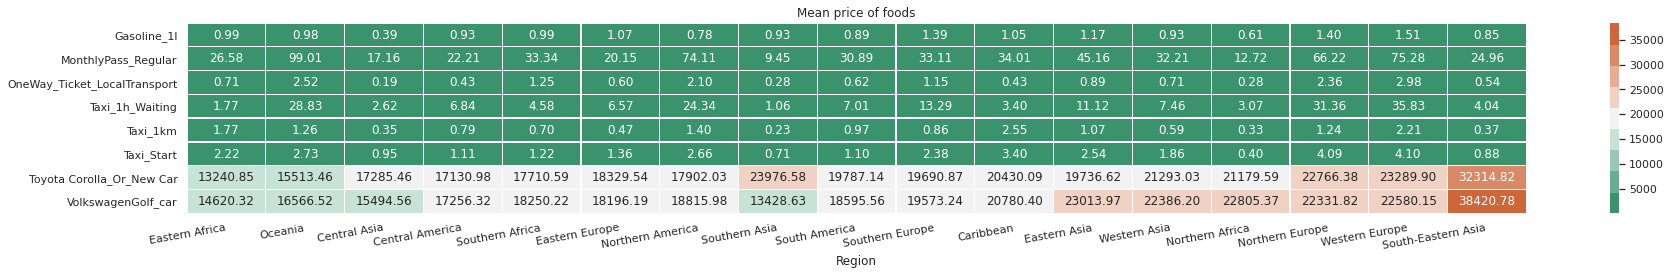

In [14]:
plt.figure(figsize=(30, 3.5))

g = sns.heatmap(transport_regions_mean.T, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(150, 385, s=80, l=55, n=9) )
g.set( title= 'Mean price of foods')
g.set_ylabel('')  
g.set_xticklabels( g.get_xticklabels(), rotation=10,  horizontalalignment='right' )


plt.show()